In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv
/kaggle/input/height/heightweight.csv


In [2]:
!pip install tensorflow
!pip install keras

In [4]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [42]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
x = df.iloc[:, 0:8].values.astype(float)
#x=df.drop("class",axis=1)

In [44]:
y=df.iloc[:,8].values.astype(float)
#y=df["class"]

In [45]:
model=Sequential()
model.add(Dense(12, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [46]:

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [49]:
model.build(input_shape=(None, 8))


In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                108       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(x,y, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
77/77 [==============================] - 1s 1ms/step - loss: 2.2021 - accuracy: 0.5794
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 1.3298 - accuracy: 0.5404
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0975 - accuracy: 0.6042
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 1.1077 - accuracy: 0.6159
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.9309 - accuracy: 0.6341
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9050 - accuracy: 0.6380
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7858 - accuracy: 0.6536
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7627 - accuracy: 0.6536
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.6628
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.6641
Epoch 11/

In [52]:
scores=model.evaluate(x,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.5423 - accuracy: 0.7031


In [53]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.31%


In [54]:
history= model.fit(x,y, validation_split=0.20, epochs=200, batch_size=10, verbose=2)

Epoch 1/200
62/62 - 0s - loss: 0.5531 - accuracy: 0.7052 - val_loss: 0.5406 - val_accuracy: 0.6753 - 235ms/epoch - 4ms/step
Epoch 2/200
62/62 - 0s - loss: 0.5495 - accuracy: 0.7020 - val_loss: 0.5549 - val_accuracy: 0.6688 - 125ms/epoch - 2ms/step
Epoch 3/200
62/62 - 0s - loss: 0.5552 - accuracy: 0.6971 - val_loss: 0.6310 - val_accuracy: 0.6558 - 118ms/epoch - 2ms/step
Epoch 4/200
62/62 - 0s - loss: 0.5600 - accuracy: 0.7020 - val_loss: 0.5576 - val_accuracy: 0.6753 - 120ms/epoch - 2ms/step
Epoch 5/200
62/62 - 0s - loss: 0.5460 - accuracy: 0.7052 - val_loss: 0.5757 - val_accuracy: 0.6688 - 113ms/epoch - 2ms/step
Epoch 6/200
62/62 - 0s - loss: 0.5600 - accuracy: 0.6922 - val_loss: 0.5693 - val_accuracy: 0.6429 - 137ms/epoch - 2ms/step
Epoch 7/200
62/62 - 0s - loss: 0.5527 - accuracy: 0.7020 - val_loss: 0.5552 - val_accuracy: 0.6558 - 127ms/epoch - 2ms/step
Epoch 8/200
62/62 - 0s - loss: 0.5550 - accuracy: 0.6971 - val_loss: 0.5626 - val_accuracy: 0.6623 - 122ms/epoch - 2ms/step
Epoch 9/

In [55]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [56]:
history.history["accuracy"]

[0.7052116990089417,
 0.7019544243812561,
 0.6970683932304382,
 0.7019544243812561,
 0.7052116990089417,
 0.6921824216842651,
 0.7019544243812561,
 0.6970683932304382,
 0.7003257274627686,
 0.6970683932304382,
 0.7003257274627686,
 0.6824104189872742,
 0.6938110589981079,
 0.7019544243812561,
 0.7035830616950989,
 0.7068403959274292,
 0.7100977301597595,
 0.6970683932304382,
 0.6986970901489258,
 0.7003257274627686,
 0.7019544243812561,
 0.6954397559165955,
 0.7117263674736023,
 0.6986970901489258,
 0.6938110589981079,
 0.6986970901489258,
 0.6986970901489258,
 0.6970683932304382,
 0.7166123986244202,
 0.7068403959274292,
 0.7133550643920898,
 0.7068403959274292,
 0.6954397559165955,
 0.6954397559165955,
 0.7117263674736023,
 0.7019544243812561,
 0.7052116990089417,
 0.6938110589981079,
 0.7052116990089417,
 0.6970683932304382,
 0.7003257274627686,
 0.6905537247657776,
 0.6905537247657776,
 0.7003257274627686,
 0.7133550643920898,
 0.7052116990089417,
 0.6970683932304382,
 0.7100977301

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

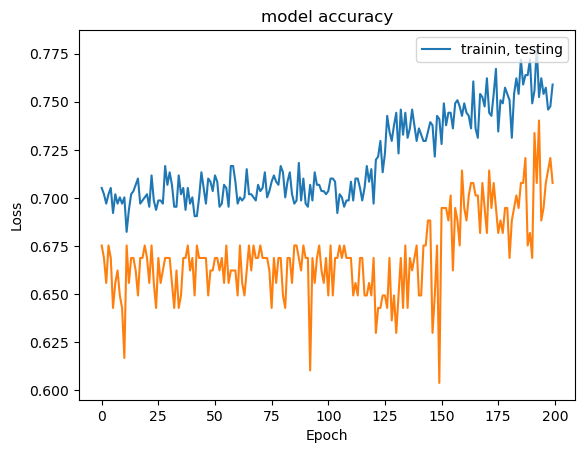

In [58]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["trainin, testing"], loc="upper right")

plt.show()

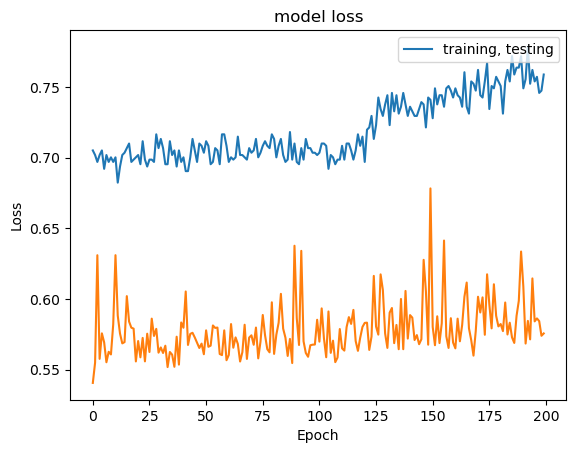

In [59]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["training, testing"], loc="upper right")

plt.show()


In [60]:
from keras.callbacks import ModelCheckpoint

In [61]:
filepath="weights.best.hdf5"
checkpoint=ModelCheckpoint(filepath, monitor="val_accuracy",verbose=1, save_best_only=True, mode="max")
callbacks_list=[checkpoint]

In [62]:
model.fit(x, y, validation_split=0.20, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)



Epoch 1: val_accuracy improved from -inf to 0.64286, saving model to weights.best.hdf5

Epoch 2: val_accuracy improved from 0.64286 to 0.70130, saving model to weights.best.hdf5

Epoch 3: val_accuracy improved from 0.70130 to 0.72078, saving model to weights.best.hdf5

Epoch 4: val_accuracy did not improve from 0.72078

Epoch 5: val_accuracy did not improve from 0.72078

Epoch 6: val_accuracy did not improve from 0.72078

Epoch 7: val_accuracy did not improve from 0.72078

Epoch 8: val_accuracy did not improve from 0.72078

Epoch 9: val_accuracy did not improve from 0.72078

Epoch 10: val_accuracy did not improve from 0.72078

Epoch 11: val_accuracy did not improve from 0.72078

Epoch 12: val_accuracy did not improve from 0.72078

Epoch 13: val_accuracy did not improve from 0.72078

Epoch 14: val_accuracy did not improve from 0.72078

Epoch 15: val_accuracy did not improve from 0.72078

Epoch 16: val_accuracy did not improve from 0.72078

Epoch 17: val_accuracy did not improve from 0.

# NORMALIZATION

In [65]:
import pandas as pd
df = pd.read_csv('../input/height/heightweight.csv')


In [66]:
df

,gender,ageYear,ageMonth,HeightIn,WeightLB
0,f,11.91667,143,56.3,85.0
1,f,12.91667,155,62.3,105.0
2,f,12.75000,153,63.3,108.0
3,f,13.41667,161,59.0,92.0
4,f,15.91667,191,62.5,112.5
...,...,...,...,...,...
232,m,13.66667,164,66.5,112.0
233,m,15.75000,189,65.0,114.0
234,m,13.66667,164,61.5,140.0
235,m,13.91667,167,62.0,107.5


In [69]:
data=df[["WeightLB","ageYear"]]

In [70]:
data.head

<bound method NDFrame.head of      WeightLB   ageYear
0        85.0  11.91667
1       105.0  12.91667
2       108.0  12.75000
3        92.0  13.41667
4       112.5  15.91667
..        ...       ...
232     112.0  13.66667
233     114.0  15.75000
234     140.0  13.66667
235     107.5  13.91667
236      87.0  12.58333

[237 rows x 2 columns]>

In [71]:
from sklearn.preprocessing import normalize, scale
data_scaled=scale(data)

In [73]:
data_scaled

array([[-0.840635  , -1.16552514],
       [ 0.19031193, -0.51288498],
       [ 0.34495397, -0.62166052],
       [-0.47980357, -0.1865649 ],
       [ 0.57691704,  1.4450355 ],
       [ 0.55114336,  0.35729973],
       [ 0.13876459,  1.11871542],
       [-1.66539255, -1.21991618],
       [-0.35093521, -0.24095593],
       [-1.69116622, -1.32868518],
       [ 0.13876459, -1.38307622],
       [ 0.11299091,  0.73800431],
       [ 1.14393785, -0.40411597],
       [-0.42825623, -0.83920506],
       [-2.61901847, -1.16552514],
       [-0.63444561, -1.05675613],
       [ 0.29340663,  1.4450355 ],
       [-1.17569276, -0.78482056],
       [ 0.7057854 , -0.9479806 ],
       [ 0.65423806,  0.84677985],
       [-0.840635  , -1.27430068],
       [-1.04682439, -1.32868518],
       [-0.91795602, -0.02340486],
       [ 0.55114336,  0.6292353 ],
       [-0.01587745,  1.11871542],
       [ 0.11299091,  0.08536415],
       [-0.40248255,  0.57484427],
       [ 0.55114336,  0.84677985],
       [ 1.99446907,

In [74]:
data_scaled.max()

4.65384528542972

In [75]:
data_scaled.min()

-2.6190184668329466

In [76]:
scale([110,20])

array([ 1., -1.])

In [78]:
data_normal=normalize(data)

In [79]:
data_normal

array([[0.99031506, 0.13883833],
       [0.99251835, 0.12209554],
       [0.99310345, 0.11724138],
       [0.98953298, 0.14430693],
       [0.99013928, 0.1400864 ],
       [0.99200295, 0.12621466],
       [0.98919069, 0.14663487],
       [0.98561093, 0.16902985],
       [0.99019251, 0.13970967],
       [0.98580427, 0.16789859],
       [0.99385457, 0.11069371],
       [0.98988564, 0.14186764],
       [0.99443538, 0.10534839],
       [0.99120461, 0.13233829],
       [0.97326951, 0.22966597],
       [0.99090905, 0.13453349],
       [0.98911643, 0.14713495],
       [0.98755811, 0.15725448],
       [0.99437439, 0.10592249],
       [0.9914543 , 0.13045451],
       [0.99058029, 0.13693316],
       [0.9897859 , 0.1425618 ],
       [0.98686887, 0.16152349],
       [0.99153446, 0.12984383],
       [0.98855016, 0.15089259],
       [0.99118604, 0.13247733],
       [0.98805398, 0.15410821],
       [0.99115044, 0.13274336],
       [0.99227788, 0.12403473],
       [0.9895506 , 0.14418605],
       [0.